## Estatística e Análise de Dados

Uma análise preliminar do conjunto de dados permite extrair informações
sobre como os atributos se relacionam com a variável alvo e ajuda a identificar
a presença de ruídos e informações inconsistentes (outliers).

### Importando bibliotecas

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Importando o conjunto de dados

In [2]:
data = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')
data

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 283817)
Coordinates:
  * latitude                 (latitude) float32 40.25
  * longitude                (longitude) float32 -73.16
  * time                     (time) datetime64[ns] 1975-10-24T12:00:00 ... 20...
Data variables: (12/13)
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    ...                       ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...
Attributes:
    institution:  NOAA National Data Buoy Center and Participators in Data As...
    url:          http://dods.ndbc.noaa.gov
    quality:      Automated QC checks with manual editing and comprehensive m...
    conventions:  COARDS
    station:      44025
    comment:      LONG ISLAND - 30 NM South of Islip, NY
    location:     40.251 N 73.164 W

**Organizando o conjunto de dados**

In [3]:
def org_dataset(data, start='2019-01-01', end='2020-01-01'):
    '''
    Função para selecionar o intervalo cujos dados serão utilizados, transformá-lo em um DataFrame e 
    calcular o tempo corrido.
    
    Parâmetros
    
    data (multiarray): conjunto de dados
    start (string): marca o dia de início do conjunto de dados.
    end (string): marca o dia de fim do conjunto de dados. Ex.: ano-mês-dia
    
    Retorno:
    
    df (pd.DatraFrame): retorno do conjunto de dados organizado
    
    '''
    data = data.sel(time=slice(start,end))

    df = data.to_dataframe()

    df.reset_index(inplace=True)

    startTime = df.time[0]
    endTime = df.time[len(df)-1]

    ts_s = pd.Timestamp(startTime)
    ts_e = pd.Timestamp(endTime)

    #0 Julian date is noon January 1, 4713 BC
    elapsed = ts_e.to_julian_date() - ts_s.to_julian_date()
    delta = pd.Timestamp(df.time[1]).to_julian_date() - pd.Timestamp(startTime).to_julian_date()

    df['elapsed_time'] = np.arange(0, elapsed, delta)[:len(df)]
    
    return df

**Uso da função**

In [4]:
dataset = org_dataset(data)

**Checando o conjunto de dados**

In [5]:
dataset.head()

,latitude,longitude,time,wind_dir,wind_spd,gust,wave_height,dominant_wpd,average_wpd,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level,elapsed_time
0,40.250999,-73.164001,2019-01-01 00:50:00,135.0,11.3,14.1,1.56,0 days 00:00:05.559999943,0 days 00:00:04.710000038,153.0,1018.400024,8.1,7.1,NaN,NaN,NaN,0.000000
1,40.250999,-73.164001,2019-01-01 01:50:00,127.0,11.2,14.0,1.92,0 days 00:00:05.880000114,0 days 00:00:05.090000153,135.0,1016.599976,8.3,7.1,NaN,NaN,NaN,0.041667
2,40.250999,-73.164001,2019-01-01 02:50:00,137.0,12.7,15.3,2.23,0 days 00:00:06.250000,0 days 00:00:05.219999790,143.0,1013.599976,8.7,7.2,NaN,NaN,NaN,0.083333
3,40.250999,-73.164001,2019-01-01 03:50:00,150.0,13.7,16.9,2.52,0 days 00:00:06.670000076,0 days 00:00:05.489999771,148.0,1010.700012,9.5,7.2,NaN,NaN,NaN,0.125000
4,40.250999,-73.164001,2019-01-01 04:50:00,168.0,9.5,11.2,2.77,0 days 00:00:07.139999866,0 days 00:00:05.750000,141.0,1010.000000,10.2,7.2,NaN,NaN,NaN,0.166667


**Método *describe***

Oferece um panorâma estatístico das variáveis numéricas do conjunto de dados. Informações como a contagem de amostras, a média, desvio padrão, mínimo e máximo dos atributos contidos no *dataset* serão apresentados. 

In [6]:
dataset[['wind_spd','air_pressure','air_temperature']].describe()

,wind_spd,air_pressure,air_temperature
count,8669.000000,8669.000000,8669.000000
mean,6.693528,1016.819458,12.502096
std,3.437403,8.206482,8.092100
min,0.000000,985.599976,-11.700000
25%,4.200000,1011.500000,6.100000
50%,6.200000,1016.900024,12.000000
75%,8.700000,1022.299988,20.100000
max,20.299999,1040.599976,27.299999


### Média

Podemos definir a **média** de um conjunto de observações $(\overline{x})$ da seguinte forma:
$$\overline{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.$$

In [7]:
print(dataset.sea_surface_temperature.mean())

13.550716400146484


### Mediana

A medida da média de uma série de atributos pode ser muito sensível à presença de *outliers*. Esse problema é minimizado utilizando a **mediana**.

Uma vez organizado em ordem crescente, a mediana de uma série pode ser definida como:

$$mediana(x) = \left\{\begin{matrix}
\frac{1}{2}\left ( x_{\frac{n}{2}} + x_{\frac{n}{2}+1} \right ), \ para \  n \ par\\ 
x_{\frac{n}{2}}, \ para \ n \ impar
\end{matrix}\right..$$

In [8]:
np.median(dataset.air_pressure)

1016.9

### Quartil

Uma vez organizada em ordem crescente, o quartil de uma série de dados pode ser definida como quaisquer um dos três valores ordenados que dividem um conjunto de dados em três partes.

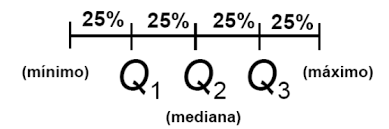

In [11]:
np.quantile(dataset.sea_surface_temperature, q=0.75)

20.299999237060547

In [12]:
for i in np.arange(0.0,1.25,0.25):
    print(f'Quartil {int(i*100)}:  {np.quantile(dataset.sea_surface_temperature,q=i)}')

Quartil 0:  3.0999999046325684
Quartil 25:  6.900000095367432
Quartil 50:  13.100000381469727
Quartil 75:  20.299999237060547
Quartil 100:  26.600000381469727


### Percentil

Análogo ao quartil, mas o conjunto de dados é dividido em 100 partes.

In [13]:
for i in range(10,110,10):
    print(f'Percentil {i}:  {np.percentile(dataset.sea_surface_temperature,q=i)}')

Percentil 10:  4.599999904632568
Percentil 20:  5.900000095367432
Percentil 30:  8.300000190734863
Percentil 40:  10.300000190734863
Percentil 50:  13.100000381469727
Percentil 60:  16.200000762939453
Percentil 70:  18.299999237060547
Percentil 80:  21.0
Percentil 90:  23.100000381469727
Percentil 100:  26.600000381469727


In [14]:
for i in np.arange(0.0,1.25,0.25):
    print(f'Quartil {int(i*100)}:  {np.quantile(dataset.sea_surface_temperature,q=i)}')

Quartil 0:  3.0999999046325684
Quartil 25:  6.900000095367432
Quartil 50:  13.100000381469727
Quartil 75:  20.299999237060547
Quartil 100:  26.600000381469727


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


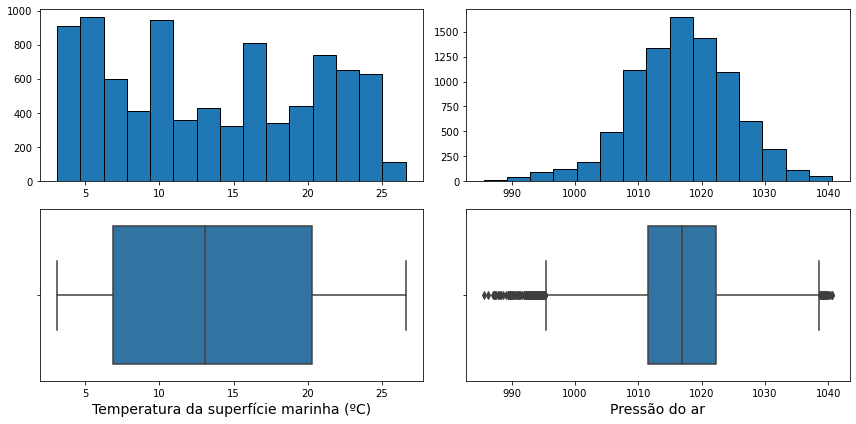

In [15]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,6))

axes[0][0].hist(dataset.sea_surface_temperature,bins=15,edgecolor='black')

axes[0][1].hist(dataset.air_pressure,bins=15,edgecolor='black')

sns.boxplot(dataset.sea_surface_temperature,ax=axes[1][0])

sns.boxplot(dataset.air_pressure,ax=axes[1][1])

axes[1][0].set_xlabel('Temperatura da superfície marinha (ºC)', fontsize=14)
axes[1][1].set_xlabel('Pressão do ar', fontsize=14)

fig.tight_layout()

## Medidas de dispersão e distribuição

As medidas definidas em torno da média de um conjunto de valores são, em sua maioria, instanciações de uma medida denominada momento:

$$M_k(x) = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^k}{(n-1)}$$

* 𝑘 = 2 é o segundo momento central, chamado de variância;
* 𝑘 = 3 é a obliquidade (skweness), ou terceiro momento central; e
* 𝑘 = 4 é a curtose (kurtosis), ou quarto momento central.

### Variância e desvio padrão

A variância (𝑣𝑎𝑟) é a medida mais utilizada para avaliar o espalhamento de valores:

$$M_2(x) = var = \frac{1}{n-1}\sum_{i=1}^{n} (x_i - \overline{x})^2$$.

É muito comum utilizar o desvio padrão:

$$\sigma = \sqrt{var}$$


In [16]:
print(2*'\t'+'Temp. da sup. do mar'+ '\t'+ 'Pressão do ar')
print('Variância:'+'\t'+f'{dataset.sea_surface_temperature.var()}'+'\t'+f'{dataset.air_pressure.var()}')
print('Desvio Padrão:'+'\t'+f'{dataset.sea_surface_temperature.std()}'+'\t'+f'{dataset.air_pressure.std()}')

		Temp. da sup. do mar	Pressão do ar
Variância:	47.099945068359375	67.34635162353516
Desvio Padrão:	6.862939834594727	8.20648193359375


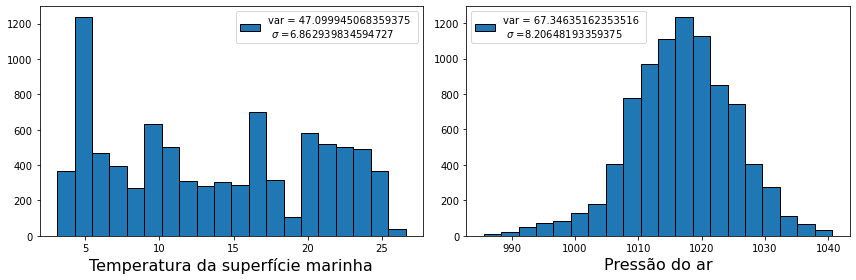

In [17]:
fig, axes = plt.subplots(ncols=2,figsize=(12,4))

# for ax in axes:
#     ax.set_xlim(-6,6)
#     ax.set_ylim(0,100)

axes[0].hist(dataset.sea_surface_temperature,bins=20,edgecolor='black',
             label=f'var = {dataset.sea_surface_temperature.var()} \n $\sigma$ ={dataset.sea_surface_temperature.std()}')
axes[0].set_xlabel('Temperatura da superfície marinha',fontsize=16)
axes[0].legend()

axes[1].hist(dataset.air_pressure,bins=20,edgecolor='black',
             label=f'var = {dataset.air_pressure.var()} \n $\sigma$ ={dataset.air_pressure.std()}')
axes[1].set_xlabel('Pressão do ar',fontsize=16)
axes[1].legend()

fig.tight_layout()

### Obliquidade

A obliquidade (*skweness*), mede a simetria da distribuição dos dados em torno da média. Para tornar a medida independente de escala, é comum dividir o terceiro momento pelo desvio padrão ($\sigma$):

$$M_3(x) = \frac{1}{n-1} \frac{\sum_{i=1}^{n} (x_i - \overline{x})^3}{\sigma^3}.$$

* $𝑀_3$ = 0 indica que a distribuição analisada é aproximadamente simétrica;
* $𝑀_3$ > 0 (positiva) indica que a distribuição é assimétrica para o lado esquerdo;e 
* $𝑀_3$ < 0 (negativa) indica que a distribuição é assimétrica para o lado direito.

In [18]:
dataset.columns

Index(['latitude', 'longitude', 'time', 'wind_dir', 'wind_spd', 'gust',
       'wave_height', 'dominant_wpd', 'average_wpd', 'mean_wave_dir',
       'air_pressure', 'air_temperature', 'sea_surface_temperature',
       'dewpt_temperature', 'visibility', 'water_level', 'elapsed_time'],
      dtype='object')

In [19]:
from scipy.stats import skew,kurtosis

In [20]:
print(3*'\t'+'Obliquidade')
colunas = dataset[['wind_spd', 'air_pressure','air_temperature','sea_surface_temperature']]
for i,j in zip(colunas,skew(colunas)):
    print(i,j)

			Obliquidade
wind_spd 0.6557048
air_pressure -0.25032383
air_temperature -0.12965713
sea_surface_temperature 0.123855196


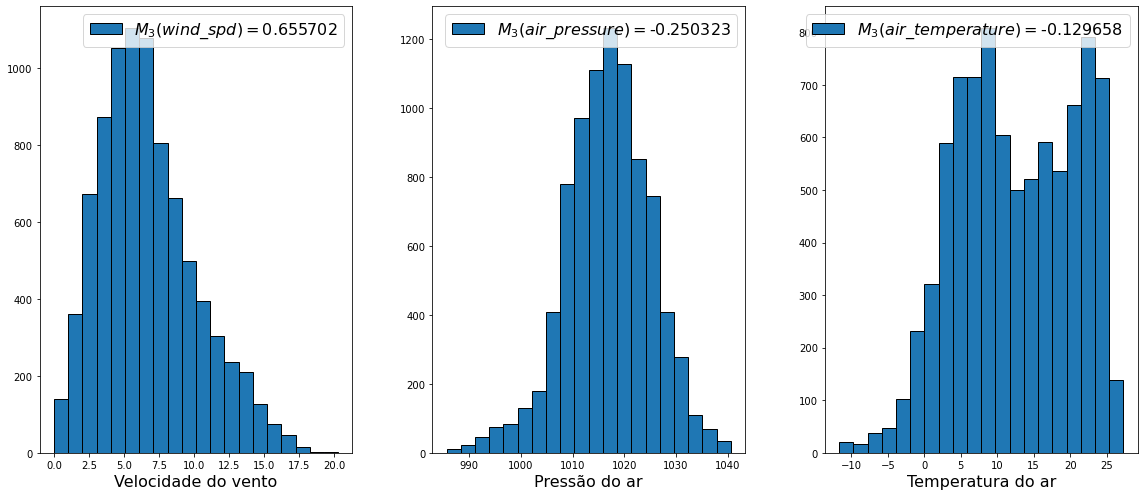

In [21]:
fig,axes = plt.subplots(ncols=3,figsize=(16,7))

axes[0].hist(colunas.wind_spd,bins=20,edgecolor='black',
             label=f'$M_3(wind\_spd)=${skew(colunas.wind_spd):f}')
axes[0].set_xlabel('Velocidade do vento',fontsize=16)

axes[1].hist(colunas.air_pressure,bins=20,edgecolor='black',
             label=f'$M_3(air\_pressure)=${skew(colunas.air_pressure):f}')
axes[1].set_xlabel('Pressão do ar',fontsize=16)

axes[2].hist(colunas.air_temperature,bins=20,edgecolor='black',
             label=f'$M_3(air\_temperature)=${skew(colunas.air_temperature):f}')
axes[2].set_xlabel('Temperatura do ar',fontsize=16)

for ax in axes:
    ax.legend(fontsize=16)

fig.tight_layout()

### Curtose

Curtose (Kurtosis) é uma medida que captura o achatamento de uma determinada distribuição:

$$M_4(x) = \frac{1}{n-1} \frac{\sum_{i=1}^{n} (x_i - \overline{x})^4}{\sigma^4}.$$

* $𝑀_4$ = 0 a distribuição apresenta um achatamento próximo de uma normal;
* $𝑀_4$ > 0 a distribuição apresenta uma alta concentração de valores; e
* $𝑀_4$ < 0 a distribuição dos dados é mais achatada (parecendo-se mais com uma distribuição uniforme).

In [22]:
print(3*'\t'+'Curtose')
for i,j in zip(colunas,kurtosis(colunas)):
    print(i,j)

			Curtose
wind_spd 0.05550766
air_pressure 0.4534042
air_temperature -0.9378092
sea_surface_temperature -1.3739212


In [23]:
colunas.head()

,wind_spd,air_pressure,air_temperature,sea_surface_temperature
0,11.3,1018.400024,8.1,7.1
1,11.2,1016.599976,8.3,7.1
2,12.7,1013.599976,8.7,7.2
3,13.7,1010.700012,9.5,7.2
4,9.5,1010.000000,10.2,7.2


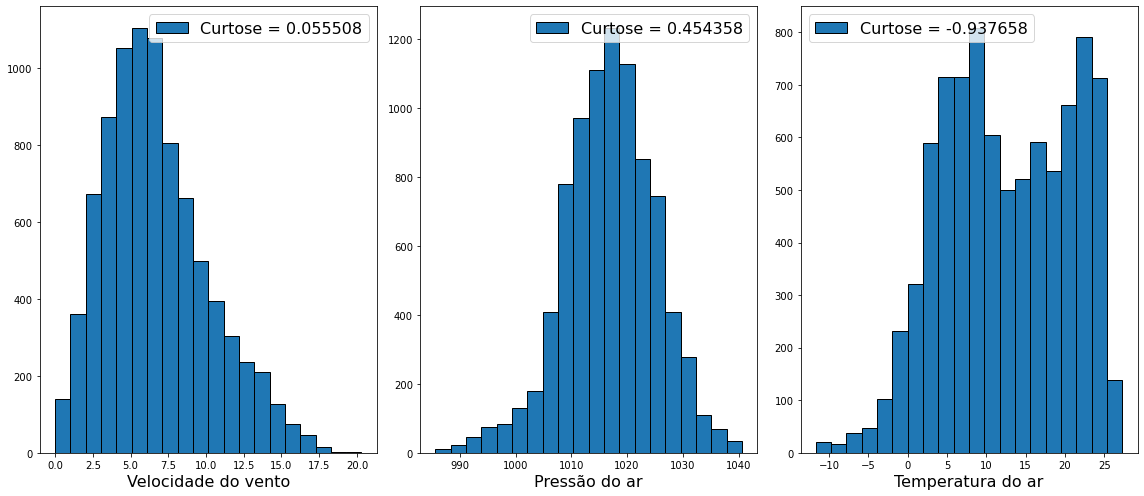

In [24]:
fig, axes = plt.subplots(ncols=3,figsize=(16,7))


axes[0].hist(colunas.wind_spd,bins=20,edgecolor='black',
             label=f'Curtose = {kurtosis(colunas.wind_spd):f}')
axes[0].set_xlabel('Velocidade do vento',fontsize=16)

axes[1].hist(colunas.air_pressure,bins=20,edgecolor='black',
             label=f'Curtose = {colunas.air_pressure.kurtosis():f}')
axes[1].set_xlabel('Pressão do ar',fontsize=16)

axes[2].hist(colunas.air_temperature,bins=20,edgecolor='black',
             label=f'Curtose = {colunas.air_temperature.kurtosis():f}')
axes[2].set_xlabel('Temperatura do ar',fontsize=16)

for ax in axes:
    ax.legend(fontsize=16)

fig.tight_layout()

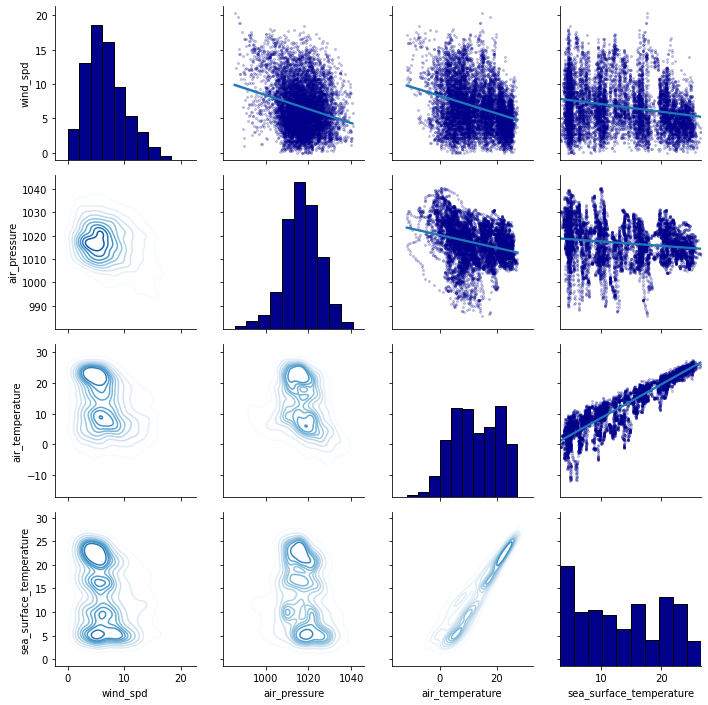

In [25]:
grid = sns.PairGrid(data=colunas, corner=False)
grid = grid.map_upper(sns.regplot, scatter_kws={'alpha': 0.2, 's':4, 'color': 'darkblue'})
grid = grid.map_diag(plt.hist, bins=10, color='darkblue', edgecolor='k')
grid = grid.map_lower(sns.kdeplot, cmap='Blues')

## Matriz de correlação 

Quando deseja-se avaliar efeitos de linearidade entre variáveis, é adequado utilizar a correlação:

$$\rho = \frac{cov(\mathbf{x_j}, \mathbf{x_k})}{\sigma_j, \sigma_k} = \frac{\sum_{i=1}^{n} (x_{ji} - \overline{x_j}) \cdot (x_{ki} - \overline{x_k})}{\sqrt{\sum_{i=1}^{n} (x_{ji} - \overline{x_j})^2} \cdot \sqrt{\sum_{i=1}^{n} (x_{ki} - \overline{x_k})^2}}$$

<AxesSubplot:>

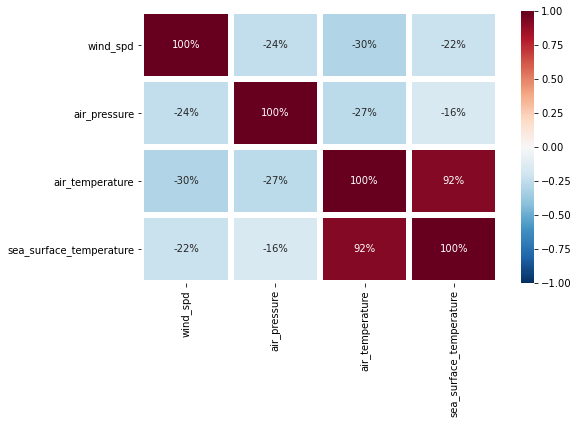

In [26]:
plt.figure(figsize=(8,5))
corr = colunas.corr()

sns.heatmap(corr, lw=5, fmt='.0%', linewidths=2, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)